In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
f = h5py.File("data-readonly/histogram_data.h5")

In [4]:
list(f.keys())

['dist',
 'weights_x',
 'weights_xy_normal',
 'weights_xy_x',
 'weights_xy_y',
 'weights_y']

In [5]:
dist = f["dist"].value

In [6]:
dist

array([[ 0.97704524,  0.21329844],
       [ 0.7872125 ,  0.96342862],
       [ 0.37149379,  0.95779083],
       ..., 
       [ 0.84323032,  0.61468443],
       [ 0.53413049,  0.69090355],
       [ 0.28109795,  0.91207249]])

In [7]:
dist.shape

(1048576, 2)

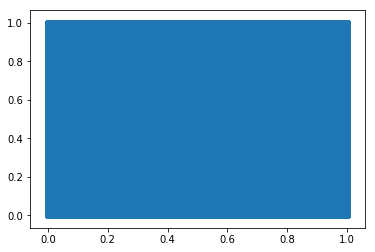

In [8]:
plt.scatter(dist[:,0], dist[:,1])

(array([ 104963.,  104861.,  104888.,  104583.,  105393.,  104493.,
         104909.,  105043.,  104722.,  104721.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

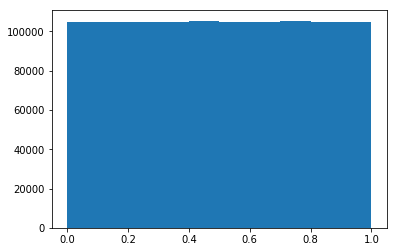

In [9]:
plt.hist(dist[:,0])

(array([ 104724.,  105310.,  105114.,  104641.,  104686.,  104822.,
         104983.,  104867.,  104584.,  104845.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

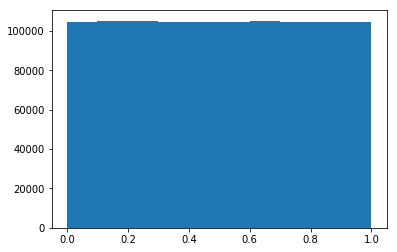

In [10]:
plt.hist(dist[:,1])

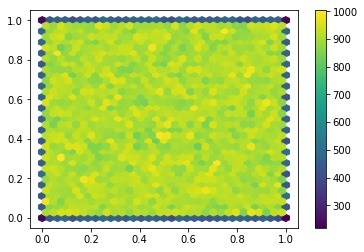

In [11]:
plt.hexbin(dist[:,0], dist[:,1], gridsize=32)
plt.colorbar();

In [12]:
weights_x = f["weights_x"].value
weights_y = f["weights_y"].value
weights_xy_x = f["weights_xy_x"].value
weights_xy_y = f["weights_xy_y"].value
weights_xy_normal = f["weights_xy_normal"].value

In [13]:
weights_x.shape

(1048576,)

(array([ 0.21269842,  0.53186148,  0.84830896,  1.16904532,  1.4895351 ,
         1.80972996,  2.1306895 ,  2.45562189,  2.76827228,  2.08866314]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

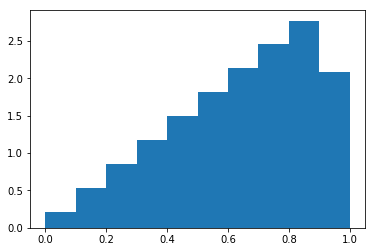

In [14]:
plt.hist(dist[:,0], weights=weights_x)

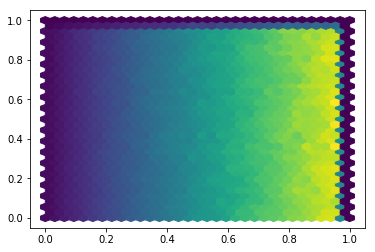

In [15]:
plt.hexbin(dist[:,0], dist[:,1], weights_xy_x, gridsize=32)

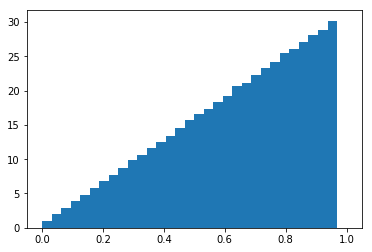

In [16]:
plt.hist(dist[:,0], weights=weights_xy_x, bins=32);

In [17]:
import ipywidgets

In [18]:
def plot_hexbin(gridsize, weight_by):
    if weight_by == "none":
        weights = None
    elif weight_by == "x":
        weights = weights_xy_x
    elif weight_by == "y":
        weights = weights_xy_y
    elif weight_by == "normal":
        weights = weights_xy_normal
    else:
        raise RuntimeError
    plt.hexbin(dist[:,0], dist[:,1], weights, gridsize=gridsize)

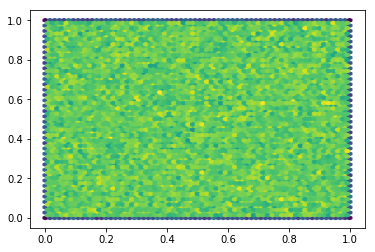

<function __main__.plot_hexbin>

In [19]:
ipywidgets.interact(plot_hexbin,
                   gridsize = (2, 128, 1),
                   weight_by = ["none", "x", "y", "normal"])

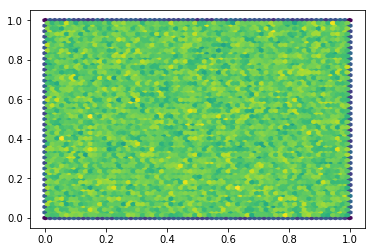

In [20]:
plot_hexbin(64, weight_by = "none")

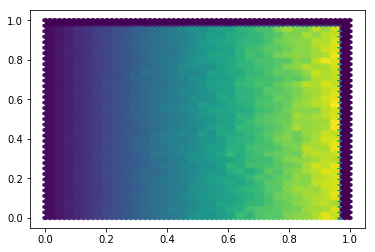

In [21]:
plot_hexbin(64, weight_by = "x")

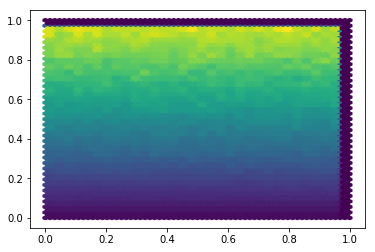

In [22]:
plot_hexbin(64, weight_by = "y")

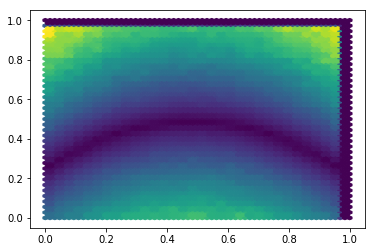

In [23]:
plot_hexbin(64, weight_by = "normal")

In [24]:
dist2 = np.random.normal(0.5, 0.1, size=dist.shape)

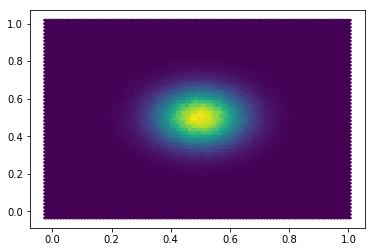

In [25]:
plt.hexbin(dist2[:,0], dist2[:,1])

* 1D histogram of x (no weighting)
* 1D histogram of x (weighted by y)
* 2D histogram of (x,y) (no weighting)

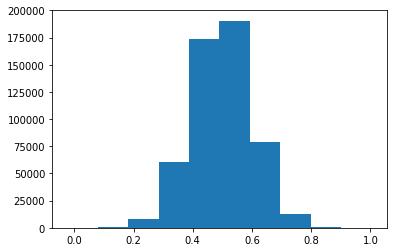

In [26]:
plt.hist(dist2[:,0], weights=dist2[:,1]);

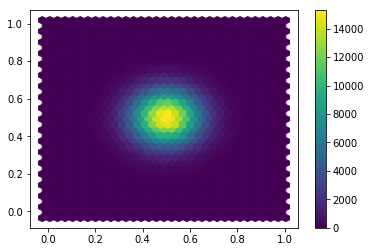

In [27]:
plt.hexbin(dist2[:,0], dist2[:,1], gridsize=32)
plt.colorbar();

In [29]:
dist3 = np.random.triangular(0.0, 0.25, 1.0, size=dist2.shape)

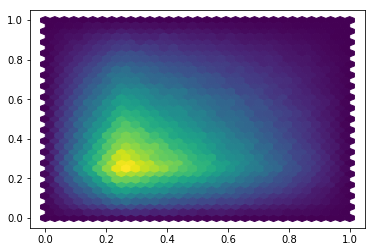

In [30]:
plt.hexbin(dist3[:,0], dist3[:,1], gridsize=32)

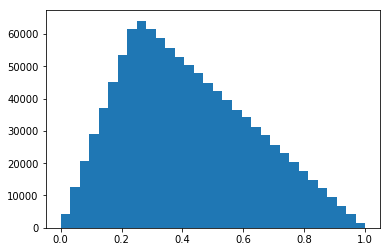

In [31]:
plt.hist(dist3[:,0], bins=32);

''

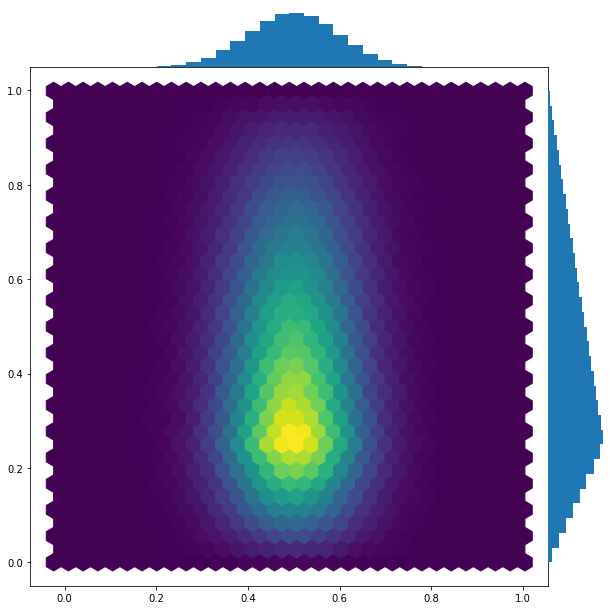

In [32]:
dist3 = np.random.triangular(0.0, 0.25, 1.0, size=dist2.shape)
fig = plt.figure(figsize=(8,8))
hexbin_axes = fig.add_axes([0.0, 0.0, 0.9, 0.9])
hexbin_axes.hexbin(dist2[:,0], dist3[:,1], gridsize=32)
histx_axes = fig.add_axes([0.0, 0.9, 0.9, 0.1])
histx_axes.hist(dist2[:,0], bins=32)
histy_axes = fig.add_axes([0.9, 0.0, 0.1, 0.9])
histy_axes.hist(dist3[:,1], bins=32, orientation='horizontal')

histx_axes.xaxis.set_visible(False)
histx_axes.yaxis.set_visible(False)
histx_axes.set_frame_on(False)

histy_axes.xaxis.set_visible(False)
histy_axes.yaxis.set_visible(False)
histy_axes.set_frame_on(False)
;

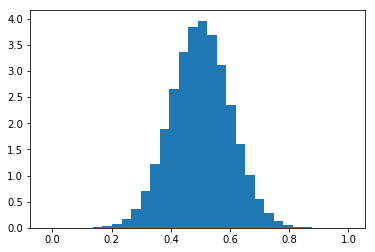

In [33]:
plt.hist(dist2[:,0], bins=32, normed=True);

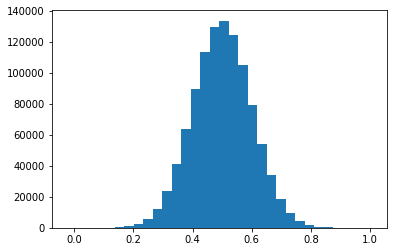

In [34]:
plt.hist(dist2[:,0], bins=32, normed=False);

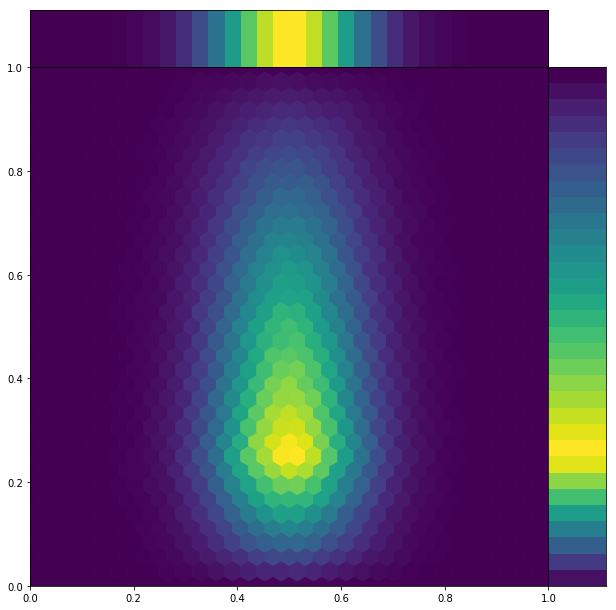

In [35]:
dist3 = np.random.triangular(0.0, 0.25, 1.0, size=dist2.shape)
fig = plt.figure(figsize=(8,8))
hexbin_axes = fig.add_axes([0.0, 0.0, 0.9, 0.9])
hb = hexbin_axes.hexbin(dist2[:,0], dist3[:,1], gridsize=32, extent = [0.0, 1.0, 0.0, 1.0])

vals, bins = np.histogram(dist2[:,0], range = [0.0, 1.0], bins = 32, normed=True)
vals.shape = (1, vals.shape[0])
histx_axes = fig.add_axes([0.0, 0.9, 0.9, 0.1], sharex = hexbin_axes)
imx = histx_axes.imshow(vals, origin='lower', extent=[0.0, 1.0, 0.0, 1.0])
histx_axes.xaxis.set_visible(False)
histx_axes.yaxis.set_visible(False)

vals, bins = np.histogram(dist3[:,1], range = [0.0, 1.0], bins = 32, normed=True)
vals.shape = (vals.shape[0], 1)
histy_axes = fig.add_axes([0.9, 0.0, 0.1, 0.9], sharey = hexbin_axes)
imy = histy_axes.imshow(vals, origin='lower', extent=[0.0, 1.0, 0.0, 1.0]);
histy_axes.xaxis.set_visible(False)
histy_axes.yaxis.set_visible(False)